<a href="https://colab.research.google.com/github/jinwoongokRe/AI_basic_study/blob/master/practice7_5_Optimizer_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimizer Test

In [1]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import fashion_mnist
(x,y), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## **2. data 전처리**

In [4]:
from tensorflow.keras.utils import to_categorical
x = x.astype('float32')
x_test = x_test.astype('float32')

x = x.reshape(60000,-1)
x_test = x_test.reshape(10000,-1)

x = x/255.
x_test = x/255.

y = to_categorical(y, 10)
y_test = to_categorical(y_test,10)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size = 1/6, random_state=3, shuffle = True, stratify=y)

### **3.optimizer list 만들기**

In [7]:
!pip install keras-rectified-adam

  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.17.0-cp36-none-any.whl size=14783 sha256=1e570559eeb45df1d32ead9709a0da768932fef1527509da8571933ec1584f21
  Stored in directory: /root/.cache/pip/wheels/7b/01/27/3a934e1a5644f5b93c720422a6ef97034ea78a21ba71cfb549
Successfully built keras-rectified-adam


In [8]:
from tensorflow.keras.optimizers import  SGD, Adagrad, RMSprop, Adam
from keras_radam.training import RAdamOptimizer

In [9]:
sgd = SGD(learning_rate = 0.001, momentum=0.0, nesterov=False)
momentum = SGD(learning_rate=0.001, momentum=0.9, nesterov=False)
nag = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
adagrad = Adagrad(learning_rate=0.001)
rmsprop = RMSprop(learning_rate=0.001, rho=0.9)
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2 =0.999)
radam = RAdamOptimizer(learning_rate=0.001, beta1=0.9, beta2=0.999)

In [10]:
optimizer_dict = {sgd : 'sgd', momentum:'momentum', nag:'nag', adagrad:'adagrad', rmsprop:'rmsprop', adam:'adam', radam:'radam'}

### **4. Make Model**

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
def create_model(optimizer_option):
  model = Sequential()
  model.add(Dense(64, input_shape=(784,), activation='relu'))
  model.add(Dense(128, activation= 'relu'))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer = optimizer_option, loss ='categorical_crossentropy', metrics=['accuracy'])
  return model

### **5. train**

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

!!!!!!!!!!
sgd
!!!!!!!!!!
Epoch 1/20
98/98 [==============================] - 1s 10ms/step - loss: 2.2939 - accuracy: 0.1615 - val_loss: 2.2707 - val_accuracy: 0.1805
Epoch 2/20
98/98 [==============================] - 1s 8ms/step - loss: 2.2515 - accuracy: 0.1922 - val_loss: 2.2330 - val_accuracy: 0.2069
Epoch 3/20
98/98 [==============================] - 1s 8ms/step - loss: 2.2165 - accuracy: 0.2128 - val_loss: 2.1996 - val_accuracy: 0.2278
Epoch 4/20
98/98 [==============================] - 1s 9ms/step - loss: 2.1835 - accuracy: 0.2378 - val_loss: 2.1662 - val_accuracy: 0.2569
Epoch 5/20
98/98 [==============================] - 1s 8ms/step - loss: 2.1492 - accuracy: 0.2769 - val_loss: 2.1305 - val_accuracy: 0.2977
Epoch 6/20
98/98 [==============================] - 1s 9ms/step - loss: 2.1119 - accuracy: 0.3304 - val_loss: 2.0910 - val_accuracy: 0.3585
Epoch 7/20
98/98 [==============================] - 1s 8ms/step - loss: 2.0705 - accuracy: 0.3921 - val_loss: 2.0475 - val_accuracy: 

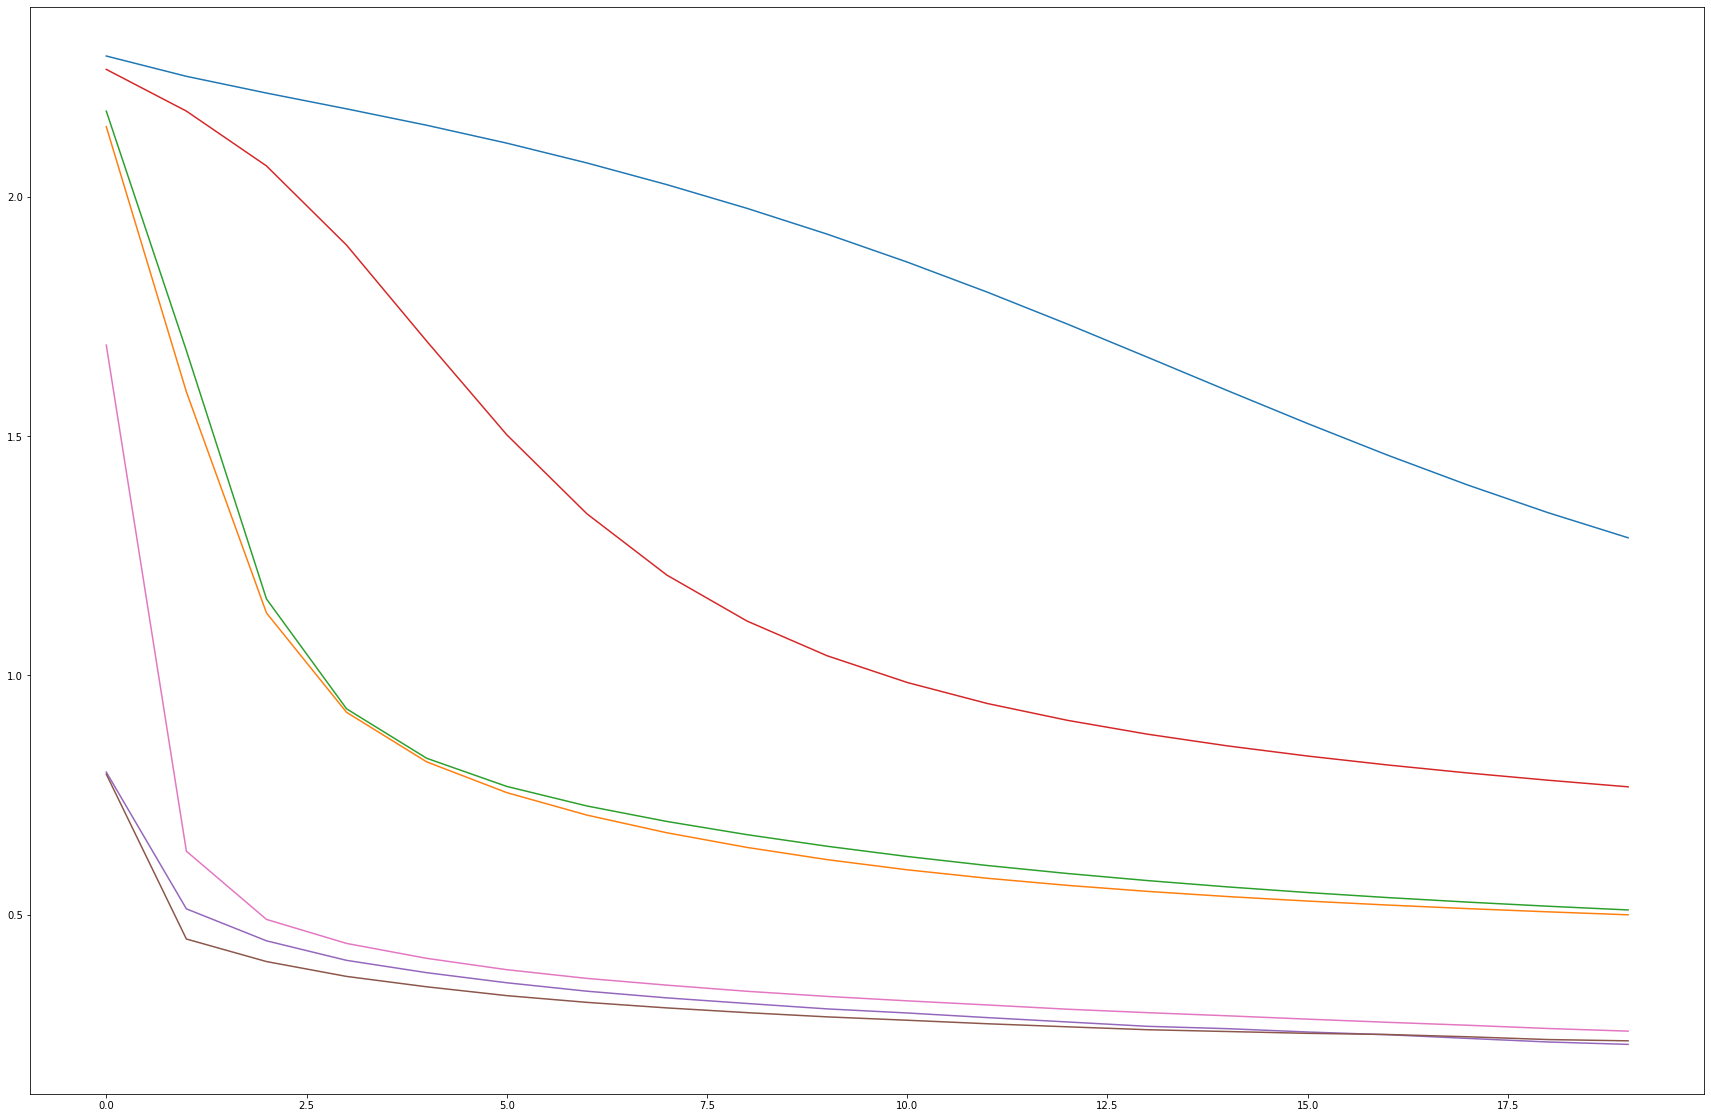

In [15]:
plt.figure(figsize=(30, 20))
for optimizer in optimizer_dict:
  model = create_model(optimizer)
  print('!'*10)
  print(optimizer_dict[optimizer])
  print('!'*10)
  history = model.fit(x,y, epochs=20, batch_size= 512, validation_split=1/6, verbose=1, shuffle=False)
  df = pd.DataFrame(history.history)
  plt.plot(history.epoch, df['loss'], label= optimizer_dict[optimizer])